Считаем файлы из дериктории и созданим датафрем из книга - предложение

За основу тестов был взят курс "Обучение на размеченных данных" с площадки Coursera, каждый текст описывает одну из тем и состоит из анатации ко всем видео из темы и дополнительному материалу по теме.

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = glob.glob('/home/pavelpp/Рабочий стол/учеба/NLP/*.txt')
d = list()
for book_file in books :
    with open(book_file, encoding='utf-8') as f :
        book = os.path.basename(book_file.split('.')[0])
        d.append(pd.DataFrame({'book': book, 'lines': f.readlines()}))
doc = pd.concat(d)
doc.head()

,book,lines
0,Знакомство с машинным обучением,\n
1,Знакомство с машинным обучением,\n
2,Знакомство с машинным обучением,"Меня зовут Евгений Соколов, и я рад приветство..."
3,Знакомство с машинным обучением,\n
4,Знакомство с машинным обучением,"В этом видео мы поговорим о том, какие бывают ..."


очистим текст от знаков пунктуации, приведем все буквы в нижний регистр, а также удалим Escape-знаки

In [2]:
import string
def remove_punctuation_and_normalize(text):
    no_punct = "".join([c.replace("\n","") for c in text if c not in string.punctuation])
    no_punct_and_normalize = no_punct.lower()
    return no_punct_and_normalize

In [3]:
doc.lines = doc.lines.apply(lambda x: remove_punctuation_and_normalize(x))
doc.head()

,book,lines
0,Знакомство с машинным обучением,
1,Знакомство с машинным обучением,
2,Знакомство с машинным обучением,меня зовут евгений соколов и я рад приветствов...
3,Знакомство с машинным обучением,
4,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают т...


удалим пустые строки из датафрейма

In [4]:
doc = doc[doc.lines.str.len() > 0]
doc.head()

,book,lines
2,Знакомство с машинным обучением,меня зовут евгений соколов и я рад приветствов...
4,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают т...
6,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают п...
8,Знакомство с машинным обучением,в этом видео мы поговорим о признаках машинног...
10,Знакомство с машинным обучением,11 знакомство с машинным обучением


токинизируем получившиеся предоложения в doc["lines"] и запишим результат в новую колонку "words"

In [5]:
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
doc['words'] = doc['lines'].apply(lambda x: tokenizer.tokenize(x))
doc.head()

,book,lines,words
2,Знакомство с машинным обучением,меня зовут евгений соколов и я рад приветствов...,"[меня, зовут, евгений, соколов, и, я, рад, при..."
4,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают т...,"[в, этом, видео, мы, поговорим, о, том, какие,..."
6,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают п...,"[в, этом, видео, мы, поговорим, о, том, какие,..."
8,Знакомство с машинным обучением,в этом видео мы поговорим о признаках машинног...,"[в, этом, видео, мы, поговорим, о, признаках, ..."
10,Знакомство с машинным обучением,11 знакомство с машинным обучением,"[11, знакомство, с, машинным, обучением]"


почистим колонку "words" от предлогов, числительныx, местоимений, чисел, а также от мусора в виде кусков символов от формул  

In [6]:
from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
import re
stop_words = stopwords.words('russian')
#print(stop_words)
def remove_stopwords(text):
    stop_words = stopwords.words('russian')
    #добавим к уже существующим всречающиеся в тексте, но не учтенные в списке слова
    stop_words.extend(['это', 'так', 'вот', 'быть', '—', 'к', 'эта',
                       'который', 'которой', 'рис'])
    reg = re.compile('[^А-я]')
    words_pre = [reg.sub('', w) for w in text if w not in stop_words]
    words = [x for x in words_pre if len(x) > 0]
    return words

Вызовем функцию def remove_stopwords(text): и в получившимся датафрейме избавимся от пустых строк

In [7]:
doc.words = doc.words.apply(lambda x: remove_stopwords(x))
doc = doc[doc.words.str.len() > 0]
doc.head()

,book,lines,words
2,Знакомство с машинным обучением,меня зовут евгений соколов и я рад приветствов...,"[зовут, евгений, соколов, рад, приветствовать,..."
4,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают т...,"[видео, поговорим, какие, бывают, типы, задач,..."
6,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают п...,"[видео, поговорим, какие, бывают, постановки, ..."
8,Знакомство с машинным обучением,в этом видео мы поговорим о признаках машинног...,"[видео, поговорим, признаках, машинного, обуче..."
10,Знакомство с машинным обучением,11 знакомство с машинным обучением,"[знакомство, машинным, обучением]"


следующий шаг - это привести все слова в doc['words'] привести в нормальную форму (лемматизация)

In [8]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
def words_normal_form(text):
    words = [morph.parse(x)[0].normal_form for x in text]
    return words

In [9]:
doc.words = doc.words.apply(lambda x: words_normal_form(x))
doc.words.head()

2     [звать, евгений, соколов, рад, приветствовать,...
4     [видео, поговорить, какой, бывать, тип, задача...
6     [видео, поговорить, какой, бывать, постановка,...
8     [видео, поговорить, признак, машинный, обучени...
10                     [знакомство, машинный, обучение]
Name: words, dtype: object

определим новую функцию для подсчета количества терминов на книгу

In [10]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


Воспользуемся функцией pretty_plot_top_n для того чтобы отобразить топ 5 слов по встречаемости в каждой из тем 

n_w
book                                          word            
Знакомство с машинным обучением               задача       120
                                              признак      115
                                              объект        80
                                              обучение      79
                                              который       67
Линейные модели                               градиентный   84
                                              объект        83
                                              линейный      82
                                              алгоритм      78
                                              ошибка        76
Линейные модели: статистический взгляд        регрессия     84
                                              который       65
                                              функция       59
                                              оценка        58
                                              задача        56
Метрики качества                              класс        123
                                              объект       123
                                              точность      98
                                              полнота       95
                                              алгоритм      85
Практические рекомендации по линейным моделям признак      149
                                              класс         98
                                              объект        78
                                              значение      63
                                              выборка       54
Проблема переобучения и борьба с ней          выборка      138
                                              алгоритм     123
                                              качество      75
                                              обучать       59
                                              дать          51
Решающие деревья                              дерево       167
                                              объект       126
                                              признак      105
                                              критерий      97
                                              значение      88
Случайные леса                                алгоритм     126
                                              дерево       110
                                              выборка      108
                                              обучать       90
                                              базовый       86

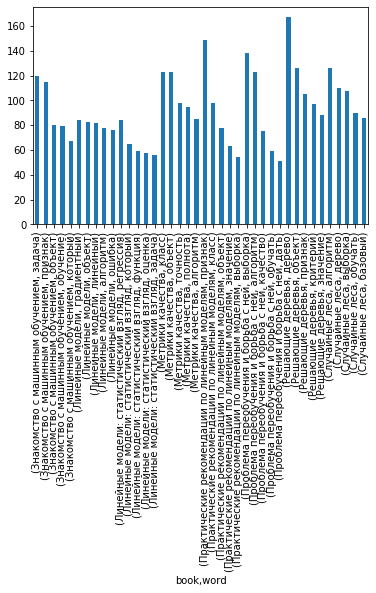

In [11]:
rows = list()
for row in doc[['book', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.book, word))

words = pd.DataFrame(rows, columns=['book', 'word'])
words.head()

counts_without_stopwords = words.groupby('book')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts_without_stopwords.head()

pretty_plot_top_n(counts_without_stopwords['n_w'])

как мы можем видеть из подсчета слов, одним из популярных слов после лемматизации является слово 'который', а это значит мы не полностью почистили датафрейм и стоит еще раз очистить его

In [12]:
doc.words = doc.words.apply(lambda x: remove_stopwords(x))
doc = doc[doc.words.str.len() > 0]


n_w
book                                          word            
Знакомство с машинным обучением               задача       120
                                              признак      115
                                              объект        80
                                              обучение      79
                                              пример        64
Линейные модели                               градиентный   84
                                              объект        83
                                              линейный      82
                                              алгоритм      78
                                              ошибка        76
Линейные модели: статистический взгляд        регрессия     84
                                              функция       59
                                              оценка        58
                                              задача        56
                                              модель        56
Метрики качества                              класс        123
                                              объект       123
                                              точность      98
                                              полнота       95
                                              алгоритм      85
Практические рекомендации по линейным моделям признак      149
                                              класс         98
                                              объект        78
                                              значение      63
                                              выборка       54
Проблема переобучения и борьба с ней          выборка      138
                                              алгоритм     123
                                              качество      75
                                              обучать       59
                                              дать          51
Решающие деревья                              дерево       167
                                              объект       126
                                              признак      105
                                              критерий      97
                                              значение      88
Случайные леса                                алгоритм     126
                                              дерево       110
                                              выборка      108
                                              обучать       90
                                              базовый       86

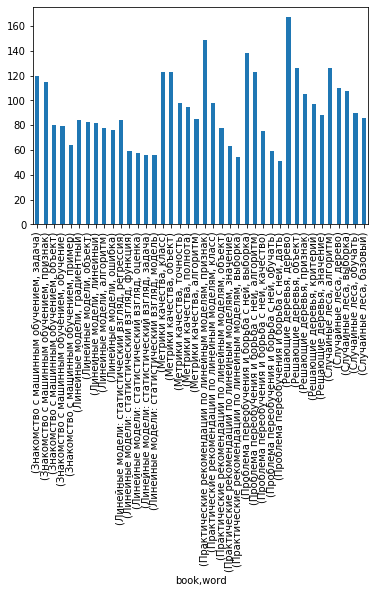

In [13]:
rows = list()
for row in doc[['book', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.book, word))

words = pd.DataFrame(rows, columns=['book', 'word'])
words.head()

counts_without_stopwords = words.groupby('book')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts_without_stopwords.head()

pretty_plot_top_n(counts_without_stopwords['n_w'])

как видим от слова 'который' мы избавелись

Следующим шагом будет подсчет TF-IDF

$$TF = \frac{n_w}{n_d}$$

Посчитаем общее число слов на документ и выведем на экран

In [14]:
word_sum = counts_without_stopwords.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
book,
Знакомство с машинным обучением,3640
Линейные модели,4682
Линейные модели: статистический взгляд,4148
Метрики качества,4326
Практические рекомендации по линейным моделям,3201
Проблема переобучения и борьба с ней,3220
Решающие деревья,4906
Случайные леса,3846


Теперь у нас есть как n_w так и n_d подсчитаем значение TF

tf
book                                          word                 
Знакомство с машинным обучением               задача       0.032967
                                              признак      0.031593
                                              объект       0.021978
                                              обучение     0.021703
                                              пример       0.017582
Линейные модели                               градиентный  0.017941
                                              объект       0.017727
                                              линейный     0.017514
                                              алгоритм     0.016660
                                              ошибка       0.016232
Линейные модели: статистический взгляд        регрессия    0.020251
                                              функция      0.014224
                                              оценка       0.013983
                                              задача       0.013500
                                              модель       0.013500
Метрики качества                              класс        0.028433
                                              объект       0.028433
                                              точность     0.022654
                                              полнота      0.021960
                                              алгоритм     0.019649
Практические рекомендации по линейным моделям признак      0.046548
                                              класс        0.030615
                                              объект       0.024367
                                              значение     0.019681
                                              выборка      0.016870
Проблема переобучения и борьба с ней          выборка      0.042857
                                              алгоритм     0.038199
                                              качество     0.023292
                                              обучать      0.018323
                                              дать         0.015839
Решающие деревья                              дерево       0.034040
                                              объект       0.025683
                                              признак      0.021402
                                              критерий     0.019772
                                              значение     0.017937
Случайные леса                                алгоритм     0.032761
                                              дерево       0.028601
                                              выборка      0.028081
                                              обучать      0.023401
                                              базовый      0.022361

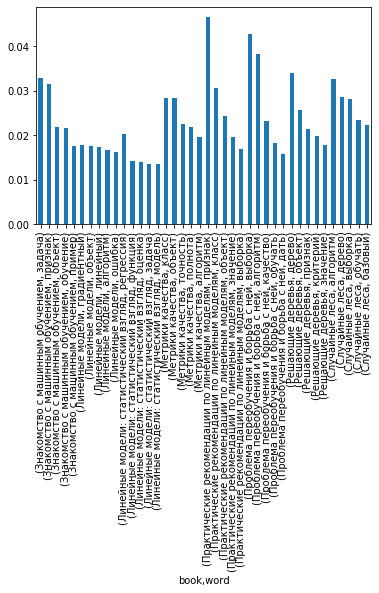

In [15]:
tf = counts_without_stopwords.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

pretty_plot_top_n(tf['tf'])

$$IDF = \log \left( \frac{c_d}{i_d} \right)$$

Значение $${c_d}$$ нам известно (8). Значение $$i_d$$ - Количество документов, в которых встречается термин а, вычислим эти значения

In [16]:
idf = words.groupby('word')\
    .book\
    .nunique()\
    .to_frame()\
    .rename(columns={'book':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
ориентировать,1
пересечение,1
пересекаться,1
перепутываться,1
перепрыгивать,1


Вычислим значения IDF

In [17]:
c_d = 8.

idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()

,i_d,idf
word,,
ориентировать,1,2.079442
пересечение,1,2.079442
пересекаться,1,2.079442
перепутываться,1,2.079442
перепрыгивать,1,2.079442


In [18]:
tf_idf = tf.join(idf)

tf_idf.head()

n_w   n_d        tf  i_d  idf
book                            word                                   
Знакомство с машинным обучением задача    120  3640  0.032967    8  0.0
                                признак   115  3640  0.031593    8  0.0
                                объект     80  3640  0.021978    8  0.0
                                обучение   79  3640  0.021703    8  0.0
                                пример     64  3640  0.017582    8  0.0

Вычислим TF-IDF statistic

TF-IDF термина а = (TF термина а) * (IDF термина а)

In [19]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w   n_d        tf  i_d  idf  \
book                            word                                      
Знакомство с машинным обучением задача    120  3640  0.032967    8  0.0   
                                признак   115  3640  0.031593    8  0.0   
                                объект     80  3640  0.021978    8  0.0   
                                обучение   79  3640  0.021703    8  0.0   
                                пример     64  3640  0.017582    8  0.0   

                                          tf_idf  
book                            word              
Знакомство с машинным обучением задача       0.0  
                                признак      0.0  
                                объект       0.0  
                                обучение     0.0  
                                пример       0.0

tf_idf
book                                          word                        
Знакомство с машинным обучением               фильм               0.033134
                                              пользователь        0.019043
                                              понравиться         0.017138
                                              учитель             0.011806
                                              постановка          0.007998
Линейные модели                               отступ              0.015545
                                              итерация            0.010659
                                              стохастический      0.009327
                                              спуск               0.006726
                                              гладкий             0.005626
Линейные модели: статистический взгляд        правдоподобие       0.028073
                                              вероятность         0.012059
                                              регуляризация       0.010360
                                              задолженность       0.010026
                                              отклик              0.009024
Метрики качества                              срабатывание        0.027399
                                              полнота             0.021539
                                              ложный              0.016824
                                              точность            0.015702
                                              кривая              0.010255
Практические рекомендации по линейным моделям несбалансированный  0.011693
                                              категориальный      0.010418
                                              масштабирование     0.008445
                                              кодирование         0.007146
                                              масштаб             0.007146
Проблема переобучения и борьба с ней          регуляризатор       0.012916
                                              регуляризация       0.008611
                                              многочлен           0.005812
                                              кроссвалидация      0.005166
                                              новый               0.004525
Решающие деревья                              дерево              0.033387
                                              критерий            0.027409
                                              вершина             0.023171
                                              лист                0.012998
                                              категориальный      0.009197
Случайные леса                                дерево              0.028053
                                              смещение            0.015860
                                              базовый             0.015499
                                              леса                0.014598
                                              композиция          0.013771

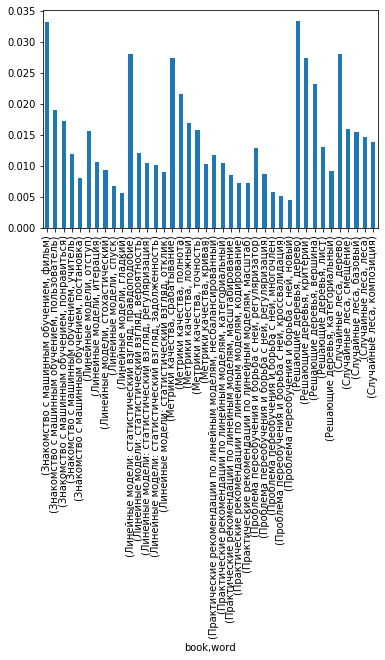

In [20]:
pretty_plot_top_n(tf_idf['tf_idf'])

HAL - Hyperspace Analogue to Language

Модель начинается с большого корпуса текста на каком-либо языке. Для каждого слова в корпусе, встречающегося более одного раза, он записывает частоты, с которыми другие слова в корпусе имеют тенденцию встречаться до и после слова в пределах заданного размера окна. Это делается путем сохранения вектора совпадений для каждого слова, равного количеству разных слов. Вместе эти векторы совместного появления образуют строки квадратной матрицы совпадений.

В данном случае нам треуются поля название документа и токинезированное, нелемматизированное, очишенное от общих слов предложение.

Нет смысла использовать все слова из текстов, поэтому возьмем топ 10 для каждого документа по количеству встречаемости в документе

In [21]:
doc.head()

,book,lines,words
2,Знакомство с машинным обучением,меня зовут евгений соколов и я рад приветствов...,"[звать, евгений, соколов, рад, приветствовать,..."
4,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают т...,"[видео, поговорить, бывать, тип, задача, обуче..."
6,Знакомство с машинным обучением,в этом видео мы поговорим о том какие бывают п...,"[видео, поговорить, бывать, постановка, задача..."
8,Знакомство с машинным обучением,в этом видео мы поговорим о признаках машинног...,"[видео, поговорить, признак, машинный, обучени..."
10,Знакомство с машинным обучением,11 знакомство с машинным обучением,"[знакомство, машинный, обучение]"


Возьмем один текст из выборки

In [22]:
doc_one_book = doc[doc.book == 'Знакомство с машинным обучением']

Создадим лист состоящий из листов представляющих каждое предложение

In [23]:
list_words_list = doc_one_book['words'].values.tolist()

Объявим функцию для подсчета количества встречаемости каждого слова

In [24]:
import operator
def select_top_occurs(train_data, occ):
    for i in range(len(train_data)):
        for j in range(len(train_data[i])):
            if train_data[i][j] in occ:
                occ[train_data[i][j]] += 1
            else:
                occ[train_data[i][j]] = 1
                
    sorted_occ = sorted(occ.items(), key=operator.itemgetter(1), reverse=True)
    sorted_occ = sorted_occ[0:10]
    sorted_occ = dict(sorted_occ)
    smaller_data = []
    for i in range(len(train_data)):
        reduced_sentence = []
        for j in range(len(train_data[i])):
            if train_data[i][j] in sorted_occ:
                reduced_sentence.append(train_data[i][j])
        if len(reduced_sentence) > 0:
            smaller_data.append(reduced_sentence)
    occ = sorted_occ
    train_data = smaller_data
    return train_data

In [25]:
occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

Посмотрим что получилось после подсчета количества встречаемости слов

In [26]:
occ

{'звать': 1,
 'евгений': 1,
 'соколов': 1,
 'рад': 1,
 'приветствовать': 2,
 'курс': 21,
 'обучение': 79,
 'разметить': 5,
 'дать': 39,
 'специализация': 2,
 'машинный': 34,
 'анализ': 5,
 'начать': 2,
 'знакомиться': 1,
 'собственно': 4,
 'центральный': 4,
 'тема': 5,
 'являться': 30,
 'учитель': 31,
 'самый': 11,
 'дело': 7,
 'немного': 2,
 'затрагивать': 1,
 'говорить': 16,
 'интерполяция': 4,
 'прошлое': 6,
 'значит': 2,
 'восстановление': 5,
 'функция': 12,
 'несколько': 17,
 'точка': 8,
 'известный': 6,
 'значение': 44,
 'общий': 13,
 'закономерность': 7,
 'конечный': 5,
 'число': 19,
 'пример': 64,
 'хотя': 4,
 'постановка': 14,
 'задача': 120,
 'похожий': 9,
 'отличие': 4,
 'решаться': 5,
 'требование': 3,
 'выдвигаться': 2,
 'решение': 14,
 'обсуждать': 3,
 'различие': 2,
 'наш': 23,
 'давать': 9,
 'разобрать': 2,
 'очень': 29,
 'сложный': 12,
 'понять': 17,
 'заключаться': 4,
 'представить': 2,
 'некоторый': 29,
 'сайт': 14,
 'фильм': 58,
 'зайти': 2,
 'найти': 10,
 'страница

In [27]:
voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1

In [28]:
indexes

{'обучение': 0,
 'пример': 1,
 'задача': 2,
 'фильм': 3,
 'пользователь': 4,
 'объект': 5,
 'ответ': 6,
 'признак': 7,
 'алгоритм': 8,
 'например': 9}

Возьмем готовую функцию для просчета матрици HAL https://github.com/mmedek/nlp-hal

WINDOW_SIZE = 2 - задаем размер окна.
LOG_BASE = 2 - основание логарифма

Нам нужно записать статистику совпадений для текста. Для каждого из типов часто встречающихся слов мы находим каждое его вхождение в тексте, а затем в окне размера WINDOW_SIZE перед ним записываете его вхождения с другими типами часто встречающихся слов, взвешенных по их расстоянию от слова.

Функция возвращает на данные в виде dict, слово и его вектор для каждого слова со значениями weight * idf.

In [29]:
import math
WINDOW_SIZE = 2
LOG_BASE = 2
def run_hal(train_data):
    for i in range(len(train_data)):
        sentence_size = len(train_data[i])
        for j in range(sentence_size):
            key = train_data[i][j]
            # compute start of sliding window
            start_ind = 0
            if j - WINDOW_SIZE >= 0:
                start_ind = j - WINDOW_SIZE
            # compute end of sliding window
            end_ind = sentence_size
            if j + WINDOW_SIZE + 1 <= sentence_size:
                end_ind = j + WINDOW_SIZE + 1
            for index in range(start_ind, end_ind, 1):
                if j != index:
                    weight = 1 / abs(j - index)
                    idf = math.log((num_words / occ[train_data[i][index]]), LOG_BASE)
                    if train_data[i][index] in voc[key]:
                        voc[key][train_data[i][index]] += weight * idf
                    else:
                        voc[key][train_data[i][index]] = 0

In [30]:
run_hal(list_words_list)

Преобразуем получившийся тип dict в более удобочитаемый DataFrame

In [31]:
type(voc)
pd.DataFrame.from_dict(voc)

,обучение,пример,задача,фильм,пользователь,объект,ответ,признак,алгоритм,например
обучение,106.252780,64.395624,156.159389,11.269234,3.219781,46.686828,11.269234,49.906609,46.686828,17.708797
пример,70.471239,19.379591,137.418916,15.856029,21.141372,70.471239,21.141372,75.756582,17.617810,29.950277
задача,126.908561,102.050183,112.516868,19.625035,9.158350,48.408420,48.408420,54.950099,49.716756,82.425148
фильм,12.829533,16.495114,27.491857,102.636267,186.944629,16.495114,34.823019,25.659067,27.491857,23.826276
объект,46.423691,64.032677,59.230226,14.407352,14.407352,116.859636,126.464538,108.855551,35.217972,22.411437
пользователь,3.879706,23.278235,13.578970,197.864994,44.616616,17.458676,38.797058,1.939853,21.338382,60.135439
алгоритм,51.755802,17.846828,67.817947,26.770242,19.631511,39.263022,44.617071,62.463899,114.219701,41.047705
например,21.027172,32.496539,120.428350,24.850295,59.258395,26.761856,19.115611,84.108689,43.965906,108.958984
признак,41.510115,57.578546,56.239510,18.746503,1.339036,91.054445,20.085539,279.858514,46.866258,58.917582
ответ,13.006725,22.297242,68.749830,35.303967,37.162070,146.790178,85.472762,27.871553,46.452588,18.581035


Повторим шаги для оставшихся текстов

In [32]:
doc_one_book = doc[doc.book == 'Линейные модели']

list_words_list = doc_one_book['words'].values.tolist()

occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1
            
run_hal(list_words_list)



In [33]:
type(voc)
pd.DataFrame.from_dict(voc)

,линейный,объект,ответ,признак,выборка,алгоритм,ошибка,вектор,градиентный,спуск
линейный,123.855331,28.582000,26.994111,58.751888,26.994111,52.400333,46.048777,38.109333,20.642555,34.933555
объект,28.424613,97.906999,93.169564,115.277596,90.011274,66.324096,53.690935,41.057774,28.424613,9.474871
признак,63.358898,125.005393,44.522469,148.979029,59.934092,27.398442,23.973637,59.934092,6.849611,1.712403
ответ,28.760452,99.815687,162.411965,43.986574,37.219409,103.199270,54.137322,45.678365,20.301496,5.075374
выборка,31.030837,104.044570,40.157554,63.887017,63.887017,41.982897,40.157554,10.952060,41.982897,38.332210
ошибка,47.638332,55.851838,52.566436,22.997816,36.139424,83.777757,72.278849,41.067528,45.995631,24.640517
алгоритм,53.590804,68.206478,99.061789,25.983420,37.351166,183.507905,82.822152,9.743783,29.231348,4.871891
вектор,40.360857,43.724262,45.405964,58.859583,10.090214,10.090214,42.042559,262.345569,63.904690,23.543833
градиентный,20.416580,28.269111,18.846074,6.282025,36.121642,28.269111,43.974172,59.679234,73.813789,263.845034
спуск,38.139646,10.401722,5.200861,1.733620,36.406026,5.200861,26.004304,24.270684,291.248206,43.340507


In [34]:
doc_one_book = doc[doc.book == 'Линейные модели: статистический взгляд']

list_words_list = doc_one_book['words'].values.tolist()

occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1
            
run_hal(list_words_list)

type(voc)
pd.DataFrame.from_dict(voc)

,задача,регрессия,вероятность,ошибка,метод,линейный,модель,правдоподобие,функция,оценка
регрессия,99.267469,63.420883,37.225301,31.710442,55.148594,52.391164,20.680723,24.816867,20.680723,31.710442
вероятность,24.341252,46.943844,140.831532,NaN,20.863931,19.125270,8.693304,15.647948,50.421166,29.557235
линейный,24.541237,66.611928,19.282400,26.294182,54.341309,36.811855,101.670837,0.000000,22.788291,10.517673
ошибка,23.368529,41.344320,NaN,59.320111,8.987896,26.963687,19.773370,3.595158,48.534637,62.915270
задача,25.067941,120.326119,23.396745,21.725549,28.410334,23.396745,36.766314,18.383157,20.054353,28.410334
модель,36.766314,25.067941,8.355980,18.383157,20.054353,96.929374,83.559805,6.684784,13.369569,26.739138
метод,29.557235,69.546436,20.863931,8.693304,38.250540,53.898488,20.863931,95.626349,15.647948,26.079913
правдоподобие,18.383157,30.081530,15.040765,3.342392,91.915785,0.000000,6.684784,65.176648,70.190236,65.176648
оценка,27.980012,37.855310,27.980012,57.605907,24.688246,9.875298,26.334129,64.189439,23.042363,49.376492
функция,19.602624,24.503281,47.373009,44.105905,14.701968,21.236176,13.068416,68.609185,55.540769,22.869728


In [35]:
doc_one_book = doc[doc.book == 'Метрики качества']

list_words_list = doc_one_book['words'].values.tolist()

occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1
            
run_hal(list_words_list)

type(voc)
pd.DataFrame.from_dict(voc)


,метрика,алгоритм,ошибка,ответ,объект,класс,точность,полнота,срабатывание,кривая
алгоритм,32.771096,65.542192,31.132541,98.313288,113.060281,68.819301,78.650630,77.012075,26.216877,14.746993
метрика,86.141689,38.285195,88.055949,17.228338,22.971117,24.885377,57.427793,42.113715,11.485559,26.799637
ошибка,85.842997,35.456890,121.299887,76.512236,31.724586,5.598456,0.000000,1.866152,5.598456,NaN
ответ,17.117359,114.115724,77.979078,123.625368,123.625368,24.725074,5.705786,0.000000,11.411572,7.607715
объект,16.463916,94.667518,23.323881,89.179546,123.479371,294.978497,43.903776,61.739685,54.879720,42.531783
класс,17.835909,57.623706,4.115979,17.835909,294.978497,161.895175,65.855665,52.135734,90.551539,63.111679
точность,46.076860,73.722976,0.000000,4.607686,49.148651,73.722976,79.866558,314.858545,46.076860,39.933279
полнота,34.283094,73.241156,1.558322,0.000000,70.124511,59.216253,319.456104,82.591090,18.699870,35.841417
срабатывание,11.560832,30.828884,5.780416,11.560832,77.072210,127.169147,57.804158,23.121663,219.655799,30.828884
кривая,25.805504,16.589252,NaN,7.373001,57.140758,84.789512,47.924507,42.394756,29.492004,171.422275


In [36]:
doc_one_book = doc[doc.book == 'Практические рекомендации по линейным моделям']

list_words_list = doc_one_book['words'].values.tolist()

occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1
            
run_hal(list_words_list)

type(voc)
pd.DataFrame.from_dict(voc)

,линейный,модель,задача,признак,случай,выборка,значение,объект,класс,категориальный
модель,145.314932,34.310470,60.547888,76.693992,0.000000,NaN,8.073052,0.000000,2.018263,10.091315
задача,52.742749,56.510089,13.185687,37.673392,5.651009,50.859080,3.767339,16.953027,94.183481,0.000000
признак,44.157951,39.952432,21.027596,237.611832,37.849672,23.130355,149.295930,52.568989,7.359659,90.418662
линейный,19.648053,141.465984,55.014549,82.521824,0.000000,0.000000,7.859221,7.859221,15.718443,13.753637
объект,6.073052,0.000000,13.664366,75.913147,28.846996,68.321832,57.693992,75.913147,198.892445,18.219155
класс,10.828873,1.353609,67.680456,9.475264,51.437147,66.326847,1.353609,177.322795,196.273323,NaN
значение,6.689296,6.689296,3.344648,237.470020,15.050917,25.084861,78.599232,63.548315,1.672324,46.825074
категориальный,14.820628,10.586163,0.000000,182.082006,0.000000,2.117233,59.282514,25.406792,NaN,14.820628
выборка,0.000000,NaN,48.155048,39.237447,41.020967,64.206731,26.752804,80.258413,87.392495,1.783520
случай,0.000000,0.000000,6.228005,74.736056,16.608012,47.748036,18.684014,39.444029,78.888059,0.000000


In [37]:
doc_one_book = doc[doc.book == 'Проблема переобучения и борьба с ней']

list_words_list = doc_one_book['words'].values.tolist()

occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1
            
run_hal(list_words_list)

type(voc)
pd.DataFrame.from_dict(voc)

,переобучение,качество,алгоритм,дать,ошибка,обучать,выборка,обучение,отложить,модель
качество,4.702974,108.168401,131.683271,23.514870,14.108922,36.056134,123.844981,53.300371,39.191450,9.405948
алгоритм,33.902682,101.708046,127.135058,61.751314,39.956732,66.594554,106.551287,52.064833,26.637822,26.637822
дать,35.071238,27.687820,94.138587,16.612692,23.996111,31.379529,90.446878,40.608802,14.766837,18.458547
ошибка,10.799351,19.438832,71.275719,28.078313,62.636238,30.238184,66.955978,15.119092,NaN,12.959222
обучение,9.523865,64.762279,81.905235,41.905004,13.333410,26.666821,95.238645,78.095689,11.428637,15.238183
переобучение,29.762228,5.580418,52.083899,35.342645,9.300696,24.181810,46.503481,9.300696,3.720278,91.146822
выборка,28.195127,89.096603,99.246849,55.262450,34.961958,144.359053,76.690747,56.390255,108.269290,30.450738
обучать,22.629695,40.037153,95.741019,29.592679,24.370441,19.148204,222.815463,24.370441,20.888950,8.703729
модель,94.094031,11.521718,42.246300,19.202863,11.521718,9.601432,51.847731,15.362291,3.840573,97.934604
отложить,4.154681,51.933516,45.701494,16.618725,NaN,24.928088,199.424702,12.464044,10.386703,4.154681


In [38]:
doc_one_book = doc[doc.book == 'Решающие деревья']

list_words_list = doc_one_book['words'].values.tolist()

occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1
            
run_hal(list_words_list)

type(voc)
pd.DataFrame.from_dict(voc)

,решающий,дерево,признак,каждый,вершина,объект,значение,класс,выборка,критерий
дерево,195.086929,231.895784,52.759358,79.752518,52.759358,62.575053,29.447084,19.631389,71.163786,58.894167
признак,26.548751,67.152722,109.318385,20.301986,70.276104,129.620370,263.925814,20.301986,23.425368,31.233824
решающий,17.371566,306.897667,32.812958,27.022436,11.581044,21.231914,1.930174,3.860348,15.441392,15.441392
вершина,10.440228,74.821632,78.301708,66.121443,76.561670,158.343455,53.941177,40.020873,31.320683,76.561670
каждый,28.033165,130.153982,26.030796,26.030796,76.090020,108.127924,18.021321,68.080545,32.037903,22.026059
объект,15.731914,72.938874,118.704442,77.229396,130.145834,158.749315,80.089744,110.123398,133.006182,62.927656
класс,3.906891,31.255125,25.394789,66.417140,44.929242,150.415288,33.208570,111.346382,33.208570,58.603359
значение,1.689098,40.538356,285.457589,15.201883,52.362043,94.589497,124.993264,28.714669,40.538356,45.605650
выборка,14.916414,108.144001,27.968276,29.832828,33.561931,173.403312,44.749242,31.697380,44.749242,85.769380
критерий,12.950860,77.705162,32.377151,17.807433,71.229732,71.229732,43.709154,48.565726,74.467447,147.316037


In [39]:
doc_one_book = doc[doc.book == 'Случайные леса']

list_words_list = doc_one_book['words'].values.tolist()

occ = {}
list_words_list = select_top_occurs(list_words_list, occ)

voc = {}
indexes = {}
counter = 0
num_words = 0
for i in range(len(list_words_list)):
    for j in range(len(list_words_list[i])):
        num_words += 1
        voc[list_words_list[i][j]] = {}
        if list_words_list[i][j] not in indexes:
            indexes[list_words_list[i][j]] = counter
            counter += 1
            
run_hal(list_words_list)

type(voc)
pd.DataFrame.from_dict(voc)

,решающий,дерево,обучать,выборка,композиция,алгоритм,объект,базовый,случайный,разброс
дерево,183.023871,132.183907,55.197675,85.701654,62.460527,42.124542,74.081091,34.861690,59.555387,21.788556
решающий,17.937274,251.121831,35.874547,67.763034,27.902426,35.874547,9.965152,39.860608,11.958182,11.958182
обучать,28.751827,60.698301,76.671538,308.283477,NaN,54.309006,84.658157,38.335769,54.309006,23.959856
выборка,49.837421,86.482584,282.900657,95.277423,7.329033,43.974195,121.661941,21.987098,49.837421,20.521291
композиция,27.521291,84.529680,NaN,9.829033,19.658065,143.503875,11.794839,72.734841,21.623872,57.008389
алгоритм,24.382985,39.283699,46.056750,40.638309,98.886552,82.631228,37.929088,266.858229,63.666684,65.021294
объект,8.997594,91.775461,95.374499,149.360064,10.797113,50.386528,111.570168,23.393745,80.978348,7.198075
базовый,32.602358,39.122829,39.122829,24.451768,60.314362,321.133224,21.191533,30.972240,65.204715,32.602358
разброс,12.395735,30.989338,30.989338,28.923382,59.912719,99.165880,8.263823,41.319117,6.197868,59.912719
случайный,9.934383,67.884952,56.294839,56.294839,18.213036,77.819336,74.507875,66.229222,92.720911,4.967192


Now create a model that predicts charts for one author (ex from book by F. Chollet "deep learning" listening 8.4)

In [1]:
text_path = "/home/pavelpp/Рабочий стол/учеба/NLP/Evgenij_Sokolov/evgenij_s.txt"
char_pred_text = open(text_path).read().lower()
print('Corpus lenght: ', len(char_pred_text))

Corpus lenght:  29774


Next extract partially overlapping sequences of lenght maxlen, one-hot encode them, and pack them in a x Numpy array (sequences, maxlen, unique_characters)

And y array with ...

In [2]:
maxlen = 60
step = 3
sentences = []
next_chars = []

for i in range(0, len(char_pred_text) - maxlen, step):
    sentences.append(char_pred_text[i: i + maxlen])
    next_chars.append(char_pred_text[i + maxlen])
    
print('Number of sentences', len(sentences))

Number of sentences 9905


In [3]:
chars = sorted(list(set(char_pred_text)))
print('Unique characters: ', len(chars))#without cleaning garbage chars, like chars from another language
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters:  74


In [4]:
char_indices

{'\n': 0,
 ' ': 1,
 "'": 2,
 '(': 3,
 ')': 4,
 '+': 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '0': 9,
 '1': 10,
 '2': 11,
 '3': 12,
 '5': 13,
 '9': 14,
 ':': 15,
 ';': 16,
 '=': 17,
 '?': 18,
 'a': 19,
 'd': 20,
 'e': 21,
 'i': 22,
 'j': 23,
 'k': 24,
 'l': 25,
 'm': 26,
 'n': 27,
 'q': 28,
 'r': 29,
 's': 30,
 't': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 '«': 35,
 '»': 36,
 'а': 37,
 'б': 38,
 'в': 39,
 'г': 40,
 'д': 41,
 'е': 42,
 'ж': 43,
 'з': 44,
 'и': 45,
 'й': 46,
 'к': 47,
 'л': 48,
 'м': 49,
 'н': 50,
 'о': 51,
 'п': 52,
 'р': 53,
 'с': 54,
 'т': 55,
 'у': 56,
 'ф': 57,
 'х': 58,
 'ц': 59,
 'ч': 60,
 'ш': 61,
 'щ': 62,
 'ъ': 63,
 'ы': 64,
 'ь': 65,
 'э': 66,
 'ю': 67,
 'я': 68,
 'ё': 69,
 '‐': 70,
 '–': 71,
 '—': 72,
 '−': 73}

In [5]:
import numpy as np
print('Vectorization...')
x = np.zeros((len(sentences),maxlen,len(chars)),dtype=np.bool)
y = np.zeros((len(sentences), len(chars)),dtype=np.bool)

for i,sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i,t,char_indices[char]] = 1 
        y[i, char_indices[next_chars[i]]] = 1 

Vectorization...


In [6]:
x

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False,  True, False, ..., False, Fal

In [7]:
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
from keras import layers
from keras.models import Sequential

model = Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars),activation='softmax'))


In [9]:
import keras
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

func for selecting the next char taking into account model predicts

In [10]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

fit model

In [13]:
import random
import sys

for epoch in range(1,60):
    print('\n epoch: ', epoch)
    model.fit(x,y,batch_size=128,epochs=1)
    
    start_index = random.randint(0,len(char_pred_text) - maxlen - 1)
    generate_text = char_pred_text[start_index: start_index + maxlen]
    print('\n Generating with seed: "' + generate_text + '"')
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('\n ----- temperature: ', temperature)
        sys.stdout.write(generate_text)
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t,char in enumerate(generate_text):
                sampled[0,t,char_indices[char]] = 1.
            
            preds = model.predict(sampled,verbose=0)[0]
            next_index = sample(preds,temperature)
            next_char = chars[next_index]
            
            generate_text += next_char
            generate_text = generate_text[:1]
            
            sys.stdout.write(next_char)


 epoch:  1
Epoch 1/1
9905/9905 [==============================] - 12s 1ms/step - loss: 1.7452

 Generating with seed: "ционала ошибки, то есть найти такой алгоритм, который будет "

 ----- temperature:  0.2
ционала ошибки, то есть найти такой алгоритм, который будет оеиоиоеооооооооооиоаииа,иииоооеиоиаеооииоииооиаоииаеоаиииооааееоооииаоиоиеииоеиоииоооиоиоиииииооаоаеииеоиооиииеиоиеиоиоаооиии,ееооооииоиоа аооооооииоиоииооооиоииоиоооеиииооеииаоооиииинооиоааиооиооаооиооееаеоиеоеоеиоииоеиооооооиииеиеоеоииоиооиооооиоииии,оииоооииииоееооооиоооииииоио иоеооеииоиооеоиоииоиеиоиииоиооооооиаооеоео,ооиооиоинаооиоиоеоиииооиооооооееиеооаооиоиаоиоииоиоооиоеоаеаооиоооиооеооиио
 ----- temperature:  0.5
ц ноинтве асиаоениоие ииио,иулсее о,еоиоиаоааиияииинвоеооиоио иииооаооное,оиооон,яоеитоеоеtе,ооииеееном,.оаоосоаиеоиатвиосиео ииое ее и,иооениоооеииаеиутоеииеяеееооеиуоеоииеое е ииеоноеодиа.оаино е-веи,ивоиео,севиосеииааоииаее,оаеиоиыроисосоеииаиои,оиинаа,.ааиегуауемоааиаоаоуоиоиоиоееоинот ис,оа,ооонеооми

о это вещественное число. или в задаче оценивание стоимости нмррррццмрцмрцрррррцррцррцррмрмрццццррцммрррцррцмрррмрцррццррцрррмцррмцррццрцмрцмррццрррммрцрмцрццрмррррццрмррмррррраммццрррррмцррмцррмрцццрррццрацррррмццццмицррцмциррррцррммрцрррмрцррцррцрммрррмррмрррмрррррццмцццрррццррмцррцрцмрццрцрррцрммррмррцмрррццрмццрцмрцмрррцрццрцррррцрмррццррмрррцццррцмрццрррррррццррццррррмцрмрццммрррммррмрцррцрлцрцаррмцлмцррмцрррррмррррцрмммрммццрмлрмурцрцмрцрцрцрцрмрмрмр
 ----- temperature:  0.5
оцеуацамцемакуррццырруммауламцц,ацмрмлурцолыурцрццацарццруимррцармццмеццмрумаррцуцаацррриррцммюррицмрюмуме,цмирыцрцциириццулыуй,рмцмммуцамццрррермерцумиил,мрмццццрмйрлыацццрицрцм,еаурррцццрцамцицррр,рцммцамрецмр,:еммауарццмлмцрсеммирццрр,срираеццааццракрмецц ц:руумрммурмиры:цр,рцмрц,ермцацциецммцррцоррурцмцум.рмцалццицвамармермумрцеарлуцрмрллуецмермцррцрцыацмамлерцррмаыраццуцееаммелццццмцр,ццмыуицр
 ----- temperature:  1.0
о.р,рк.мыра.цамрл,рю.:ииммце,еояр:сма:й,луцммрцамр,‐урр,уруцлйлаеррцуццрмрллиы,млрцрсер

ые числа. например, в задаче кредитного скоринга это может быиииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииии
 ----- temperature:  0.5
ыиииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииикииииииииииииииииииииииииииикиииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииифииииииииииииииииииииииииииииифииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииикииииииииииииииииииииииииииииииииииииииииииии
 ----- temperature:  1.0
ыииеииииииии-икииииефиии1кииииеоипктифиииеикиииииаиииикктииктиииккнииииииииптпииикиииии

льзователи заходили на страницу фильмов, принимали решение по                                                                                                                                                                                                                                                                                                                                                               а                                               
 ----- temperature:  0.5
л         а а     а     а  а         а а              аа    о     а о  ао   а  а а    а    ао  а  а а                       а  у  а           ааа  а   о        а    а             а               о  а         а   а                       ао             а   ао        а    а  а                            а а    а    а  а         а            а аа               а          а              а а  а     а    
 ----- temperature:  1.0
л р . у     а ааа а. аадо р  аа аа а   ро  р       о а м а м ао   о  а   ммиаа уи н.  р

 например ответом может быть любое вещественное число, то мы сссммссссссммссмссмсссссссссссмссмммммссссмссссссссмсссссмссссссмсссссс смсмсс ссссссммссмссмссмсссссммссммсмссссмсссмммсссссссмсмсссссссссссссссмссмсммсмммсссссссссссммссссссмсмсммсссссссмссссмсммссмссмсмссссмсссссссссссссссссссммсмссмсссмсмсссмссмссссмссссссмммсссссссссмисссссссссмссссмсссмммсссссссссмсссссмссссссссмсмссмссмсссссссмссссссмсссссмсссссмсссссссссссссссссссссссмсссмсссссссссссссссм
 ----- temperature:  0.5
 мм сссссммсмсмссс смс  сммссмссссмммссмсссммммсссссмм,мсссмссмсссмссмсммммсмссмсмсссссм,сссмсмммм смсссссссссммисмсммсссс исссмс иммммссмсммсссмсммсс сс мсссммммсммссммс,сксмсссм с мссмссмссмссмсссссмиссссссмммиисс м мсмсмсм см смм смсмисмссммссмссссссссммиссммссисмисимс мссмсс и с ссмммссммсмсссссссмсммм смссммсссммссммсссс сс,ммсссссмссмм  сссмсмсммсмссммсмсммимссссмимсссссммс ссммссссссиммиимсс
 ----- temperature:  1.0
 м ,ссссх с тимм сммс ссссмссмнсм,сйим  сссссммйкксмсмсос м,симсссмам,  ссссмсскобк,мтм

выдаст пользователю рекомендацию, смотреть или не смотреть. ииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииитиииииииииииииииииииииииииииииииииииииииииииииииииитиииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииииии
 ----- temperature:  0.5
вииииииитиииииииииитиииииитиииииииииииииииииииииииииииитииииииииииииииииииитииииииииииииииииииииииииииииитииииииииитииииииииииииииииииитииииииииитииииииииииииииииттиитииииииииииииииииииииииитииииииииитиитиииииииииииииитиииититиитииииииитииииииииииииитиитттииитиииииитиииииииииииииииитиииитиииииииитииииииииииитииииииииииииииитиииииииитиииииитиииииииииииииииииииииииитииииииииитииииииииииииииииииитииит
 ----- temperature:  1.0
виисииииииииииииитииитиитиииттиииииииииттииииииииииииоии тиииититииииииититсиииииииитти

ногомерной выборки. чтобы глядя на это изображение, можно быкннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннн
 ----- temperature:  0.5
ннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннниннннннннннннннннннннннннннннннннннннннн,ннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннн
 ----- temperature:  1.0
ннан.ннннни.,нннн,нонннн,ннннн ннннннннниннннннннннннннннннаннннннннннннан ,ннннннннн,н

ов бесконечное количество, например ответом может быть любоетееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееыеееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееыееееееееееееееееееееееееееееееееееееееееееееееееееееееееыеееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее
 ----- temperature:  0.5
оеееееее,ееезыееееыееыеыыееее,ееемц,еееееыееее,ыееыеееееееееечееееыееееыеееее,еееееееыеееымеееыееееееееееееыыееыыыеыыееыееееыееееы,еыеыееыееееееееееееееееее,еее,зеееееыыеыееыые,ееы,ееееыеыееы,ееыеыееееыеыееыыееыееееее,ы,ееееее,ееееееееоеыые,еы,ееыыееыеыеееыее,еееыееееееееееееы,еее,еыееееыеыеееееее,еееееееееееыееыееыеыееее,еееееыеееееемеыеыееееееееееееыые,ыы,е,ыееееее,еееыеееыеыееееыееееее,ее,ееееее
 ----- temperature:  1.0
оеее,еенцееее,ыыеxеееыеееыыеыееыевыцыыеыеее,е-ые,еыееыык,,,ыеыемыее,еыеыоые,ыееыеееыеац

г, у которых цена вписывается в несколько сотен, и с дорогимыяояяотяоотяяятятяяояяяоояяятттяяяяяояояояояяояояяотяояяяотяяояояояяояояяотояяяяотяяояяяятяо яооя яттояяотятояяояяяяятяяаяяояя яоояяяояяяяоо оояяяояяяотяоояоояяояяояоятятяоятя тояя яяяоттооттояояяятяояяояоооятяяяояоояяояояоо ятяяяяояя ооятяяояяоя ттяоятяяяяяятояотяяояяяяяяяяяояяояяяояяятятяяяяоятояоояяяяяяояяятоятяоояояяят ояотяяятяяоот яяятяяятяяяя яояяооятятяооояояоояяяяояяяяоооояятяяяяяяяоооооо
 ----- temperature:  0.5
гояоаяяоокояяоооауояо яояяя  яоцяяо яяяяояяо тяаояяоотцттоо тоятт яятяятьоо тоятооеяяяяоякояоттотооо ятьтаоаяояояот яояояяк яостяяяя я отяятоототоояооотяот яттятоаяояяяаояутояооояоткттотяяяяокяцеяяот тоят яотояяято ояо я тотоотятоооо оотоооояо уотояяотоояяяяотяяяяоооя ояяояятояттоояооояттяо яятяятяяято о тяяаоотя яо тя яяятеяоояяо  оояотяояятяттт я оутяояоатяттяяоао т ятя ко я ятоясяятяояяяо тяотоо
 ----- temperature:  1.0
г ояя кмсяогяцаоттцояооотятоутцямтаяшяяоокоа.яоооаутукятя—ут  яторстоято тт яя я у:оо а

о небольших городов с населением в несколько десятков тысяч нннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннн
 ----- temperature:  0.5
онннннннннннннннннннннннннннннннннннннннннннннннннннннннн.нннннннннннннннннннннн.нннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннннн
 ----- temperature:  1.0
онннн.ннннннаннанннннн нннннн.ннннннннннннн.нннннненнннннннн.ннннннннннннннннннннзнаннн

это выражение — верное, то значение скобок равно 1, если же пууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууу
 ----- temperature:  0.5
эуууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууунууууууууууууууууууууууууууууууууууууууууууууууунууууууууууууууууунуууууууууууууууууууууунууууууууууууууууууууууууууууунууууууувуунуууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууууунуууууу
 ----- temperature:  1.0
энууууоууунууууунуоннвууууууууууууууууууууиууууу.ууунууоуууууоуоууеунууууунуоуууунуууну

е всего, будут проблемы. он будет пытаться хорошо работать и рррррррчрмрррррррррррррррррррррррррррррррррррррррррррррмрррррррррмррррррррчрррррррррррррррррррррррррррмррррмррррррррррррррррррррррррррррррррмрррррррррррррррррррррррррррррррррррррррррррррчрррррмрррррррмррррррррррррррчррррррмрррррррррррррррчрррррррррррррррррррррррррррррррррмррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррррмрррррррррррррррррррррррррррррррррррррррррррмррррррр
 ----- temperature:  0.5
емрррррммррррмррмрмррмрррммчммммрррмммррррчмрррмррррррррррррмрррррмччрррррррчрчмрмчмррмммрррррмчммррррррррррррррррчмррчрррчрррррррррмрчррррррмррммрмррррммррррррчрчрррмммрррчмрмррррмррррммррчмрррммрррррррммррррмрмррчмррчррмррчррррмчррррррчрчрмрчмрррмрмчрмррчммрмрррччрчмммрчрмрррчррррррррррмчремрмммрмрчрррмрчррмрррррррчмрррррмммррррмррмрррррчрчррмрмрррррччмррмрмммрччрчмрррррррррррррмрчрмрмрмррррмчррм
 ----- temperature:  1.0
емрррррмемячрррррррмчррчмррмрмреррчррчрмррмрррчрмммммррррррммчмчммремчрмррчрррчмчрррорр

перь поговорим о двух проблемах, с которыми можно столкнутьсямииикииииммиииииииииииммииииммииимиииииимиииимкииимиииииииииииииииииимииииииииииииииимииимииииииииииимиииимиииииикииимииииииимииииииииииииимиииимимимиимимикикиииииииммиииикииииимиимииииииимиииииимимииииимииииииииииииииикоиииииииикиимимиикииииимеиимиииииимиииииикииииимиииеиииимммкииииииииииииииииииииикиииииииимммиииимимииииммиииммиимимиииииииииииииииииимиимиииимиииииикмиииииииимиииииииикиииммммиик
 ----- temperature:  0.5
писикииммикисях оиякмиимммикиимимкеоиммемкммиииииоииимкимиииииикмиммиияикияояиекикии ииоомииимокемомкмиикя кккмкиииоикимимокмкиииимиммимиикеииоимикмиким емикииикмммиеиемямиоеиииикимимииииикеии икя ямияиммкиииимиикиикимикммии еимияиииимикокимяиямоммммииими имммиииммииимиииииикииеммииеиммкиооомиииоммииккмккмкмкимиикммммммиикккмкимиикмкмииммммекиииекмиииии иммимиииимикмимиикиимьимииким икиимиииимимими
 ----- temperature:  1.0
пои ою омкьи,я ьемомммкеюмиоиеоккякямомиди0оьдккиимииии яюоиияяяоиииикояимяокмисичяемия

версона находится некое логическое выражение, например, «знат................. ...н.....................................................................................................................н.....н......................................................................н.н..............................................................................н.....н... ........................н..... .............................н..............................
 ----- temperature:  0.5
в....н... . ..н..... .....н . ......н... .н ...... .... ........ н.н .... н.н.н .  н.....н....ннн.....  .....н  .........н..... ...н..н...н. ............. ..н.... .н...н .н..... .н ... ..н......н.. . .... .н.н..н .....н.  .......н...... ... н.........н. ...... н............н ..нн.н... .... ....н...... . н.. ..... .. .н....н..,ннн................н...н....н. ...нн.... ...н.н ...  ....нн...... н .... 
 ----- temperature:  1.0
в.н...н....н. .... .. н .  ... ....н ннн .... н. н.....н.нн..ннн......н.н.н.н...,. . н.

м курсе. интерполяция — это значит восстановление функции полааааааааадааааадаадааааааадааадааааааааааааааааааааааааааадаааааададаааааааааааааааадааааааааааааааааааааааааааааааааааааааааааааааааадааааааааааааааааааааааааааааааааааааааааааааааааааааааааадаададааааадаааааааааааааааааадааааааааааадаааааааааааааааддадааааааааааааадааадааааааааааадааааааааааааааааааадаааааааааааааадааааааааааададаааааааааааадааааааадаааааааадааааадаааааадааааааааааааааааааааааа
 ----- temperature:  0.5
мадааааааадддддадааааададдаааааддадааададаададааааааааааадаааааадааааддааададаадаадададааааааааадаадаааадаададаададаадаададаадааааааададаааддааааааааададаааададдааддддаадаадддадааааааааааадаааадаадааадддааадаааааааааааадааааададададааааааддааааааааддадаадааааааааааддаддааадаааддаддаааааааадаааадаадааадааддаааааадааааддааадддадааааааааааааааадааадааааадаааааааааааааааадаааааададдаададаадааааадаадааа
 ----- temperature:  1.0
мддадаададаадатдддаадддаадддаддаааадааа аадцаа,дадааадааадааддащатдададдаааадддадаа аит